# **Mentorness | Machine Learning | Remote Internship**

---
## **Task No# 02:- Disease Prediction:**

### **Define the Problem Statement:**
   - Predictive Modeling for Disease Diagnosis

### **Objective:**
   - The objective of this project is to develop a predictive model that can accurately classify individuals into diseased or non-diseased categories based on their health attributes. By leveraging machine learning algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease diagnosis and prognosis.

#### **Step No# 01:- Import Libraries:**

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore') 

#### **Step No# 02:- Load Data:**

In [3]:
# Load the training and test datasets
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

#### **Step No# 03:- Data Preprocessing:**

In [4]:
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [6]:
train_data.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

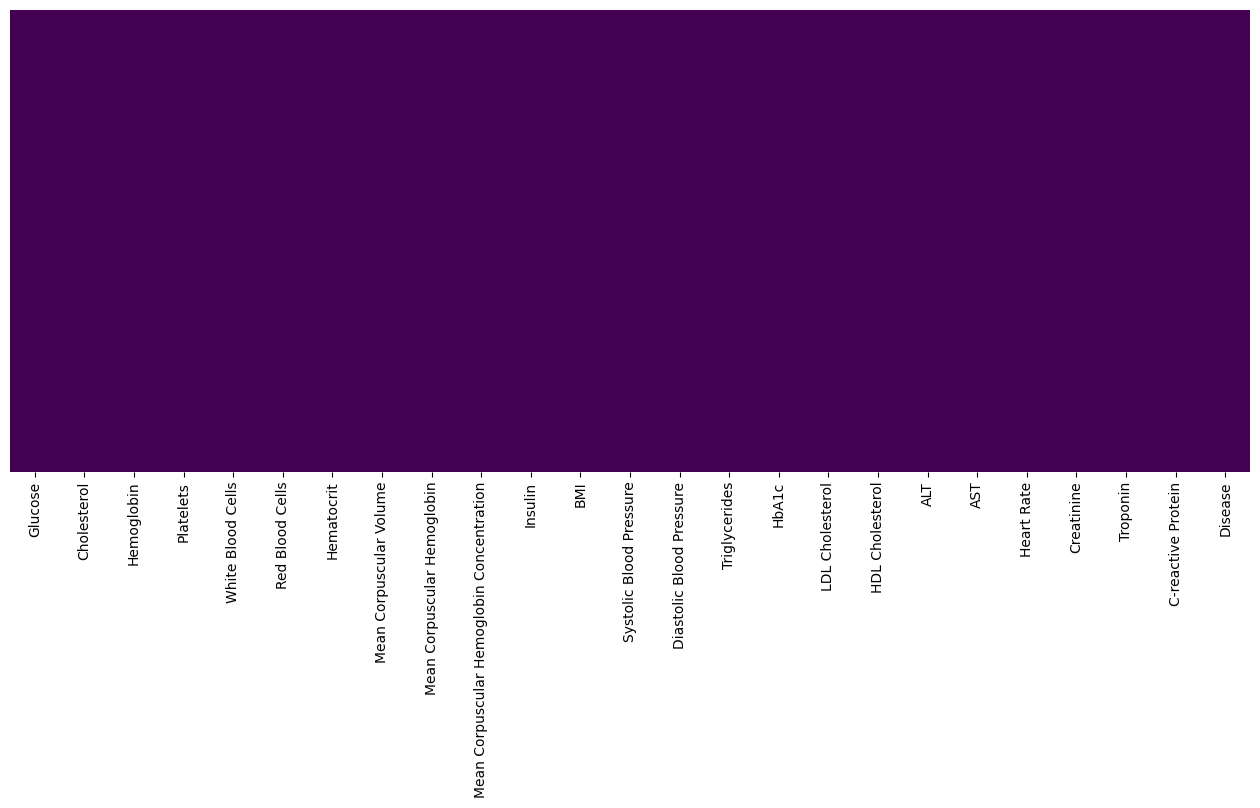

In [7]:
# plot missing values in Train Data
plt.figure(figsize=(16, 6))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [8]:
# Handle missing values if any
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [9]:
test_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,0.645755,0.070888,0.616684,0.168031,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,0.353929,0.681551,0.498084,0.216581,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,0.310422,0.454435,0.966303,0.967512,0.521000,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,0.819216,0.542478,0.023462,0.744379,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,0.681771,0.600863,0.293196,0.968128,0.082744,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [11]:
# Columns in Test Data:
test_data.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

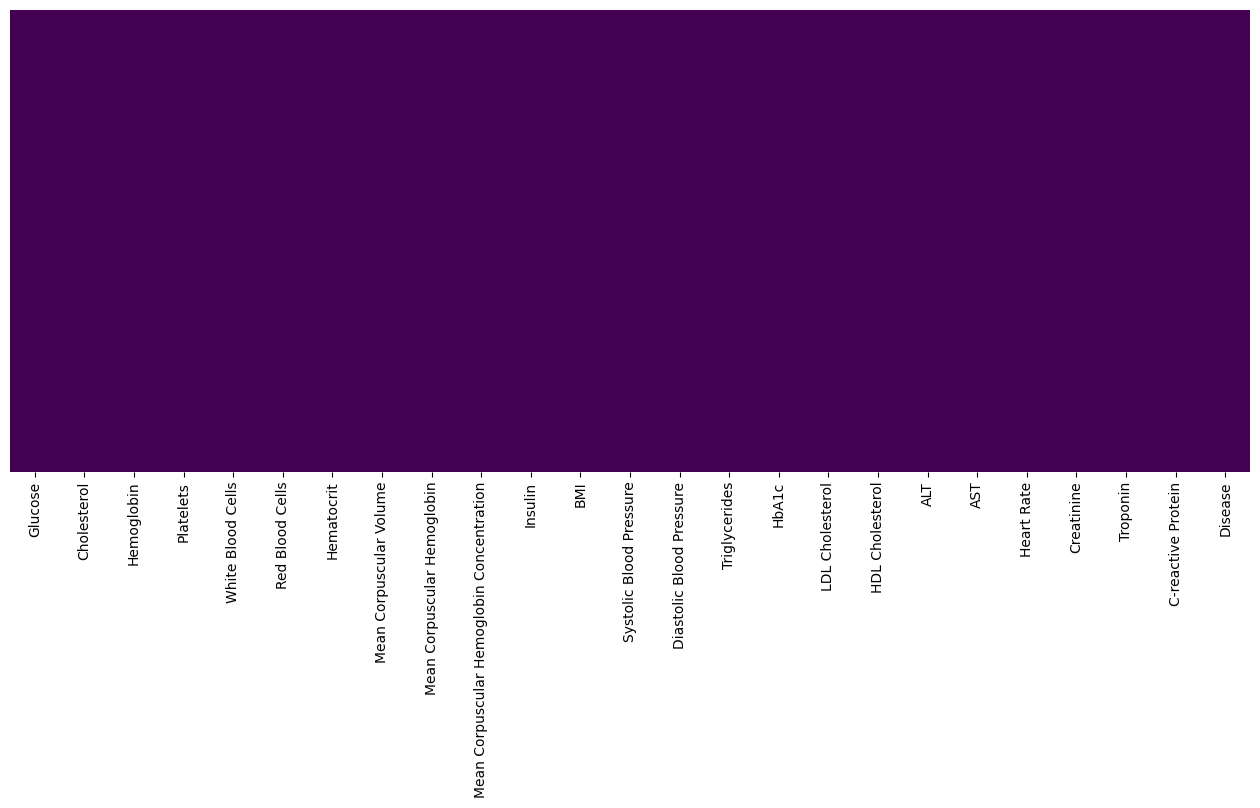

In [12]:
# plot missing values in Train Data
plt.figure(figsize=(16, 6))
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [13]:
# Separate features and target variable
X_train = train_data.drop(columns=['Disease'])
y_train = train_data['Disease']
X_test = test_data.drop(columns=['Disease'])
y_test = test_data['Disease']

#### **Step No# 04:- Feature Engineering:**

In [14]:
# Create new features
X_train['BMI_squared'] = X_train['BMI'] ** 2
X_test['BMI_squared'] = X_test['BMI'] ** 2

X_train['Glucose_Cholesterol_interaction'] = X_train['Glucose'] * X_train['Cholesterol']
X_test['Glucose_Cholesterol_interaction'] = X_test['Glucose'] * X_test['Cholesterol']

X_train['Log_Insulin'] = np.log(X_train['Insulin'] + 1)
X_test['Log_Insulin'] = np.log(X_test['Insulin'] + 1)

#### **Step No# 05:- Feature Scaling:**

In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Step No# 06:- Model Selection and Hyperparameter Tuning:**

In [16]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_scaled, y_train)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(n_estimators=50)

#### **Step No# 07:- Model Evaluation:**

In [17]:
# Predictions
y_pred_train = best_rf_model.predict(X_train_scaled)
y_pred_test = best_rf_model.predict(X_test_scaled)

In [18]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100

# For multiclass classification, use average='macro', 'micro', or 'weighted'
train_precision = precision_score(y_train, y_pred_train, average='weighted') * 100
test_precision = precision_score(y_test, y_pred_test, average='weighted') * 100

train_recall = recall_score(y_train, y_pred_train, average='weighted') * 100
test_recall = recall_score(y_test, y_pred_test, average='weighted') * 100

train_f1 = f1_score(y_train, y_pred_train, average='weighted') * 100
test_f1 = f1_score(y_test, y_pred_test, average='weighted') * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"\nTraining Precision: {train_precision:.2f}%")
print(f"Test Precision: {test_precision:.2f}%")
print(f"\nTraining Recall: {train_recall:.2f}%")
print(f"Test Recall: {test_recall:.2f}%")
print(f"\nTraining F1-score: {train_f1:.2f}%")
print(f"Test F1-score: {test_f1:.2f}%")

Training Accuracy: 100.00%
Test Accuracy: 44.03%

Training Precision: 100.00%
Test Precision: 50.94%

Training Recall: 100.00%
Test Recall: 44.03%

Training F1-score: 100.00%
Test F1-score: 44.65%


#### **Step No# 08:- Visualize Feature Distributions:**

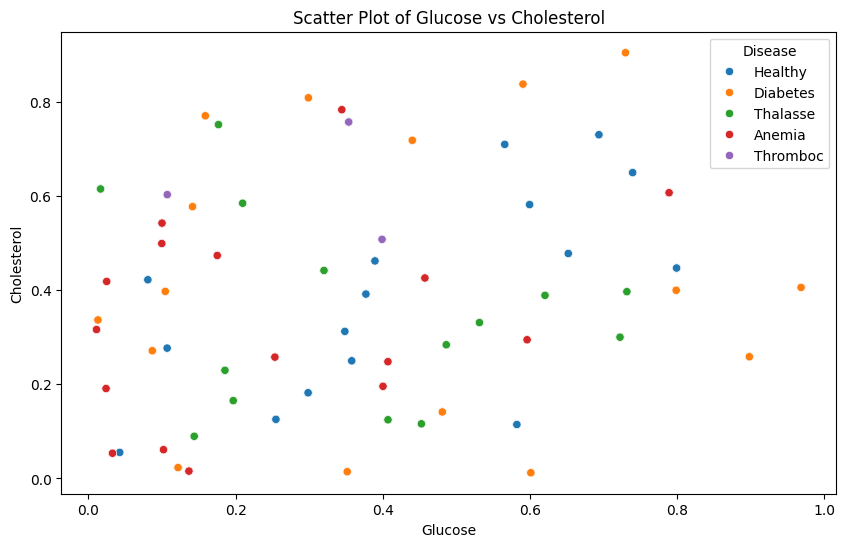

In [19]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Glucose', y='Cholesterol', hue='Disease')
plt.title('Scatter Plot of Glucose vs Cholesterol')
plt.xlabel('Glucose')
plt.ylabel('Cholesterol')
plt.show()

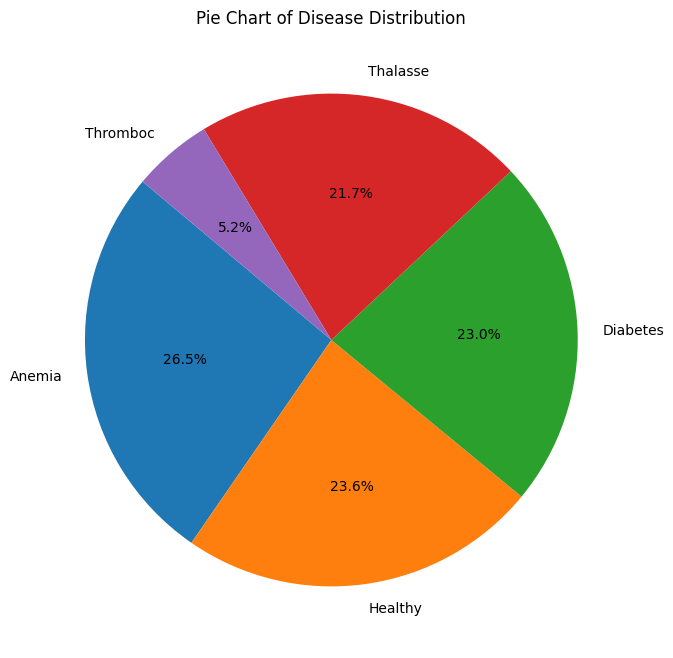

In [20]:
# Pie Chart
disease_counts = train_data['Disease'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Disease Distribution')
plt.show()

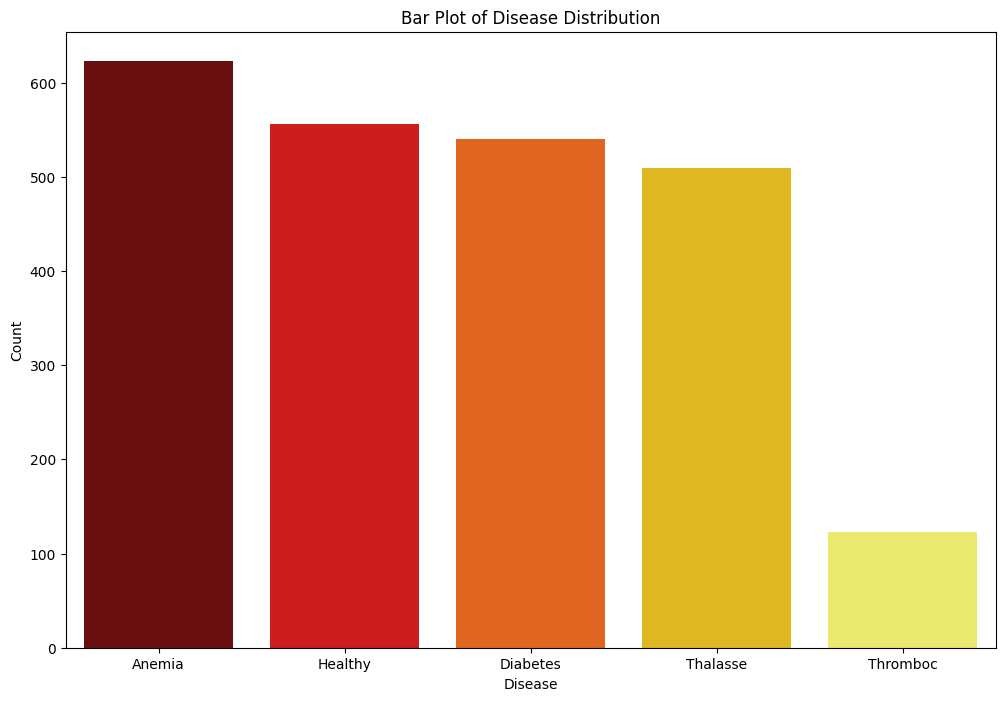

In [21]:
# Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=disease_counts.index, y=disease_counts.values, palette="hot")
plt.title('Bar Plot of Disease Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

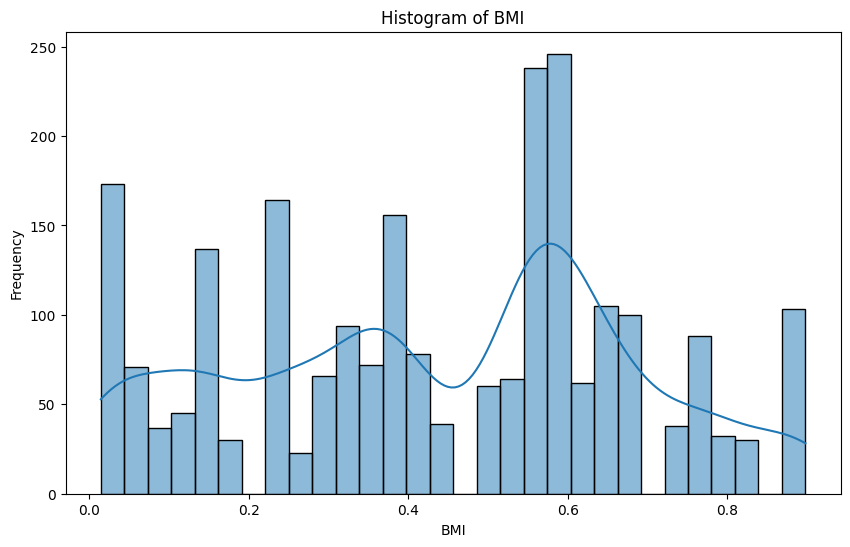

In [22]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_data['BMI'], kde=True, bins=30)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Example data for Sunburst Chart
sunburst_data = train_data.copy()
sunburst_data['BMI_Category'] = pd.cut(train_data['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
sunburst_data['Blood_Pressure_Category'] = pd.cut(train_data['Systolic Blood Pressure'], bins=[0, 120, 130, 140, 200], labels=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2'])

fig = px.sunburst(sunburst_data, path=['Disease', 'BMI_Category', 'Blood_Pressure_Category'],
                  values='BMI', color='Disease', color_continuous_scale='RdBu')
fig.update_layout(title='Sunburst Chart of Disease, BMI, and Blood Pressure Categories')
fig.show()